In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [4]:
import datetime as dt

df['date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')
df['total_bill'] = df['total_bill'].astype(float)
df['sales'] = df['total_bill'] + df['tip']
df.head()

,total_bill,tip,sex,smoker,day,time,size,date,sales
0,16.99,1.01,Female,No,Sun,Dinner,2,2023-01-01,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,2023-01-02,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,2023-01-03,24.51
3,23.68,3.31,Male,No,Sun,Dinner,2,2023-01-04,26.99
4,24.59,3.61,Female,No,Sun,Dinner,4,2023-01-05,28.20


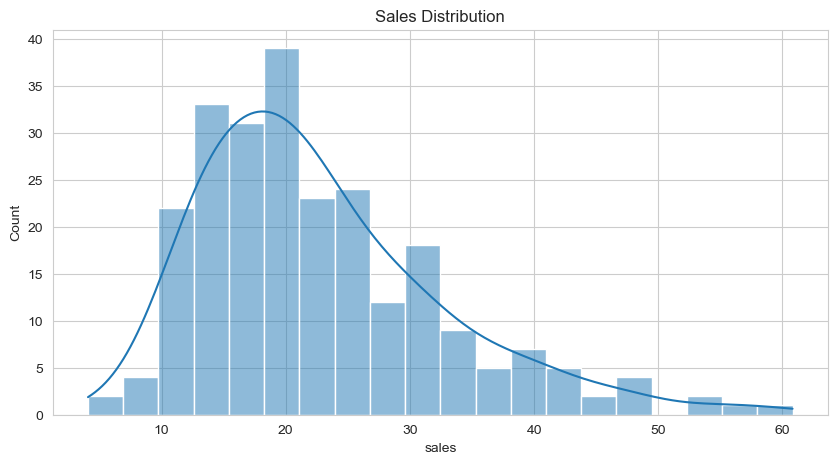

C:\Users\Hp\AppData\Local\Temp\ipykernel_7700\1229380296.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day', y='sales', data=df, estimator=sum, ci=None)


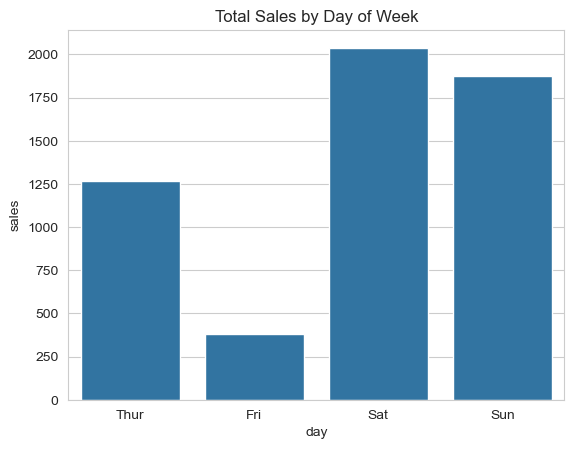

C:\Users\Hp\AppData\Local\Temp\ipykernel_7700\1229380296.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='tip', data=df, estimator=np.mean, ci=None)


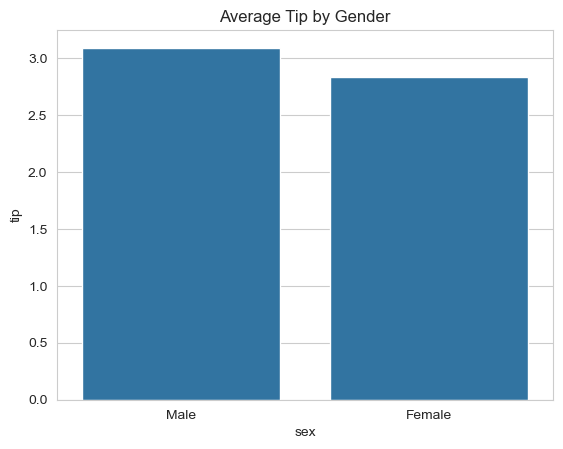

In [5]:
# Basic distributions
plt.figure(figsize=(10,5))
sns.histplot(df['sales'], bins=20, kde=True)
plt.title('Sales Distribution')
plt.show()

# Total sales by day
sns.barplot(x='day', y='sales', data=df, estimator=sum, ci=None)
plt.title('Total Sales by Day of Week')
plt.show()

# Average tip by gender
sns.barplot(x='sex', y='tip', data=df, estimator=np.mean, ci=None)
plt.title('Average Tip by Gender')
plt.show()

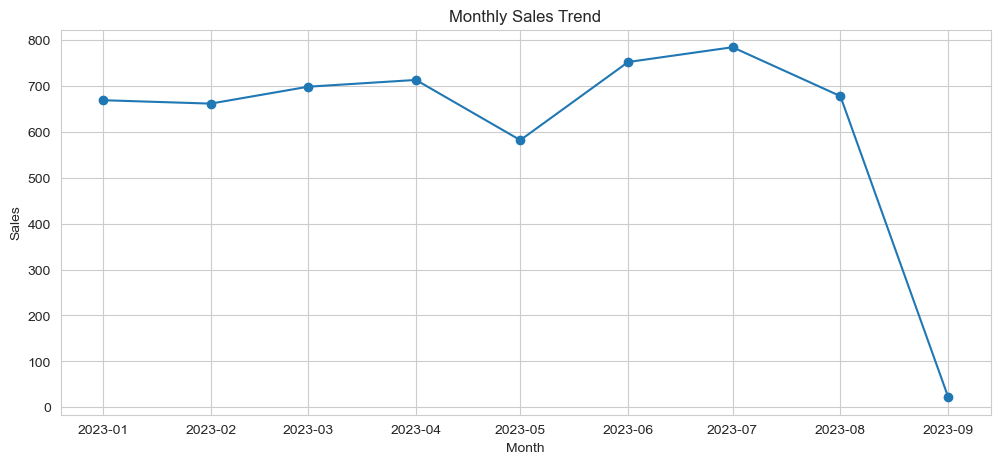

In [6]:
# Aggregate by month
df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()
monthly = df.groupby('month')['sales'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(monthly['month'], monthly['sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

#### Simple Moving Average Forecast

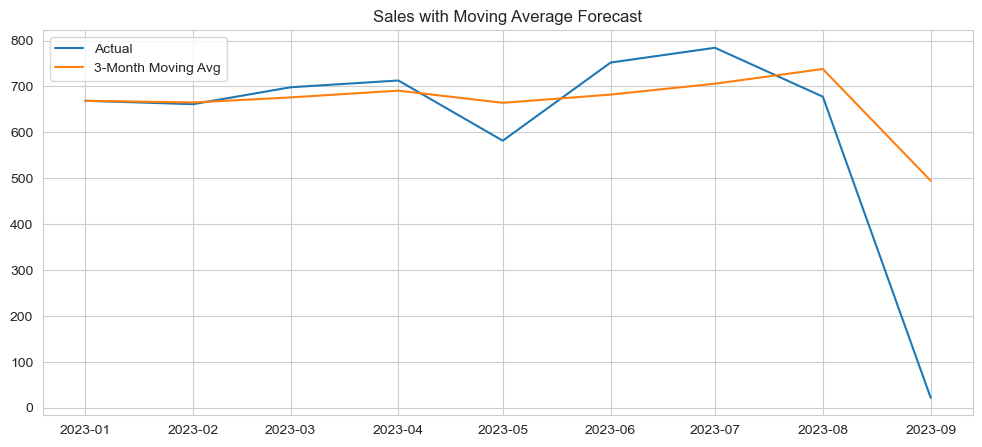

In [7]:
monthly['MA_3'] = monthly['sales'].rolling(window=3, min_periods=1).mean()
plt.figure(figsize=(12,5))
plt.plot(monthly['month'], monthly['sales'], label='Actual')
plt.plot(monthly['month'], monthly['MA_3'], label='3-Month Moving Avg')
plt.legend()
plt.title('Sales with Moving Average Forecast')
plt.show()

INSIGHTS:
- Peak sales days can indicate restaurant traffic patterns.
- Higher tips are correlated with higher total bills.
- Weekends tend to show higher revenue.
- Moving average forecast can guide next-month expectations.